### Spam

In [51]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv(r'C:\Users\Tamilselvan.E\Downloads\Spam classification\smsspamcollection\SMSSpamCollection',sep='\t',header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns=['label','message']

In [9]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

In [11]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamilselvan.E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

### data cleaning

#### stemming

In [16]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [24]:
corpus_s=list()
for i in range(len(df)):
    sentence=re.sub('[^a-zA-Z0-9]',' ',df['message'][i])
    words=nltk.word_tokenize(sentence)
    words=[stemmer.stem(word) for word in words if word not in stopwords]
    corpus_s.append(' '.join(words))

In [25]:
corpus_s

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate t c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah i think goe usf live around though',
 'freemsg hey darl 3 week word back i like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak they treat like aid patent',
 'as per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner as valu network custom select receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour',
 'had mobil 11 month u r entitl updat latest colour mobil camera free call the mobil updat co free 08002986030',
 'i gon na home soon want talk stuff anymor tonight k i cri enough today',
 'six chanc win cash from 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repl

In [36]:
### target
y=pd.get_dummies(df['label'],drop_first=True)

#### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus_s,y,test_size=0.20,random_state=0)

#### data preprocessing 
- 1. word to vectors(One-Hot Encoding)
- 2. Sentence to vectors(BOW,TF-IDF)

#### BOW

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train_arr=cv.fit_transform(X_train).toarray()
X_train_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
X_test_arr=cv.transform(X_test).toarray()
X_test_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### RandomForest

classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.86      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy Score:0.98


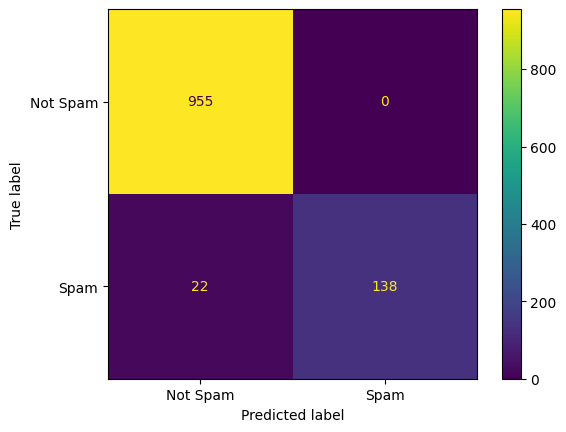

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_arr,np.ravel(np.array(y_train).reshape(-1,1)))
y_test_pred=rf_clf.predict(X_test_arr)


from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

print(f'classification report:\n{classification_report(y_test,y_test_pred)}')
print(f'Accuracy Score:{accuracy_score(y_test,y_test_pred):.2f}')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred),
                       display_labels=['Not Spam','Spam']).plot()

#### TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
X_train_arr=cv.fit_transform(X_train).toarray()
X_train_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X_test_arr=cv.transform(X_test).toarray()
X_test_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### RandomForest Classifier

classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy Score:0.98


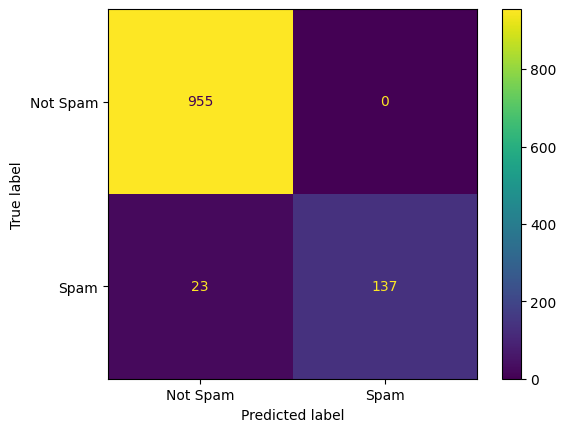

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_arr,np.ravel(np.array(y_train).reshape(-1,1)))
y_test_pred=rf_clf.predict(X_test_arr)


from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

print(f'classification report:\n{classification_report(y_test,y_test_pred)}')
print(f'Accuracy Score:{accuracy_score(y_test,y_test_pred):.2f}')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred),
                       display_labels=['Not Spam','Spam']).plot()